# Homework 7

In [15]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

## Sambanova

### higher ntasks and ntasks-per-node is better

In [16]:
def process_log_file1(folder_path):
    global_steps = []
    average_losses = []
    step_losses = []
    
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".out"):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    match = re.search(r'global_step:(\d+)\|average_loss:(\d+\.\d+)\|step_loss:(\d+\.\d+)', line)
                    if match:
                        global_step = int(match.group(1))
                        average_loss = float(match.group(2))
                        step_loss = float(match.group(3))
                        global_steps.append(global_step)
                        average_losses.append(average_loss)
                        step_losses.append(step_loss)

    df = pd.DataFrame({
        'Global Step': global_steps,
        'Average Loss': average_losses,
        'Step Loss': step_losses
    })
    print(df)
    return df

     Global Step  Average Loss  Step Loss
0              1      11.18015   11.18015
1              2      11.21173   11.21173
2              3      11.19759   11.19759
3              4      11.21306   11.21306
4              5      11.22167   11.22167
..           ...           ...        ...
500          501       8.35419    8.35419
501          502       8.28439    8.28439
502          503       8.29161    8.29161
503          504       8.30016    8.30016
504          505       8.32533    8.32533

[505 rows x 3 columns]


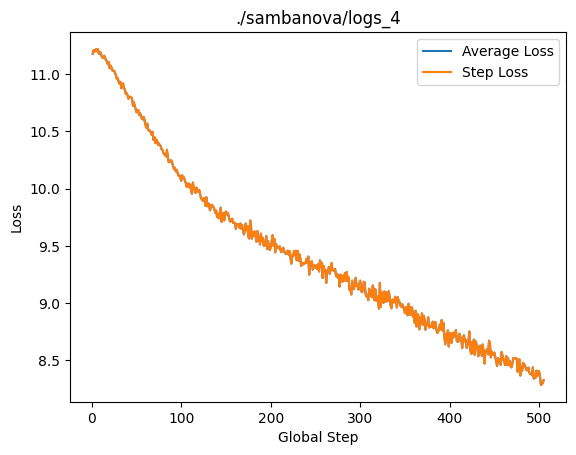

     Global Step  Average Loss  Step Loss
0              1      11.18162   11.18162
1              2      11.21508   11.21508
2              3      11.19106   11.19106
3              4      11.22715   11.22715
4              5      11.18823   11.18823
..           ...           ...        ...
500          501       8.34529    8.34529
501          502       8.23870    8.23870
502          503       8.25886    8.25886
503          504       8.19670    8.19670
504          505       8.23795    8.23795

[505 rows x 3 columns]


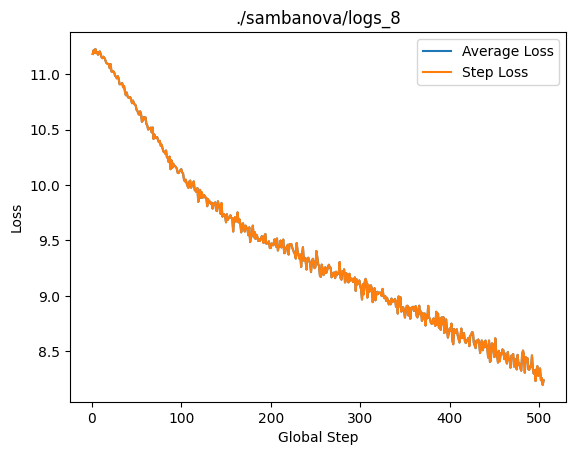

     Global Step  Average Loss  Step Loss
0              1      11.20842   11.20842
1              2      11.18979   11.18979
2              3      11.20203   11.20203
3              4      11.20612   11.20612
4              5      11.20501   11.20501
..           ...           ...        ...
500          501       8.26627    8.26627
501          502       8.31599    8.31599
502          503       8.21997    8.21997
503          504       8.32076    8.32076
504          505       8.20024    8.20024

[505 rows x 3 columns]


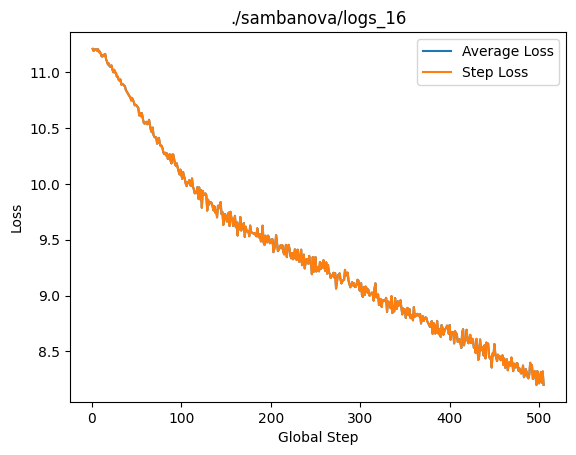

In [17]:
folder_paths = ['./sambanova/logs_4', './sambanova/logs_8', './sambanova/logs_16']

for folder_path in folder_paths:
    df = process_log_file1(folder_path)
    plt.plot(df['Global Step'], df['Average Loss'], label='Average Loss')
    plt.plot(df['Global Step'], df['Step Loss'], label='Step Loss')
    plt.xlabel('Global Step')
    plt.ylabel('Loss')
    plt.title(folder_path)
    plt.legend()
    plt.show()

## Graphcore

### the loss and accuracy data for each epoch have been plotted here. the discontinuities correspond to epoch change. there are large number of losses and accuracy values for each epoch (the average values show trends). the total test accuracy and the type of training are shown above each graph. {batch size (b4, b8, b16), learning rate (l3 for 0.3, l03 for 0.03, l003 for 0.003), and epochs (e_10, e_20)}

In [24]:
def extract_info(line):
    loss_accuracy_match = loss_accuracy_pattern.search(line)
    epoch_match = epochs_pattern.search(line)
    
    if loss_accuracy_match and epoch_match:
        return float(loss_accuracy_match.group(1)), float(loss_accuracy_match.group(2)), int(epoch_match.group(1))
    elif loss_accuracy_match:
        return float(loss_accuracy_match.group(1)), float(loss_accuracy_match.group(2)), None
    elif epoch_match:
        return None, None, int(epoch_match.group(1))
    else:
        return None, None, None

In [25]:
def plot_data(data, test_accuracies):
    for file_name, epochs_data in data.items():
        epochs, losses, accuracies = zip(*epochs_data)
        
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        axs[0].plot(epochs, losses, label='Loss', color='blue')
        axs[0].set_xlabel('Epochs')
        axs[0].set_ylabel('Loss')
        axs[0].set_title(f'{file_name}\nTest Set Accuracy: {test_accuracies[file_name]}')
        axs[0].legend()
        axs[0].grid(True)

        axs[1].plot(epochs, accuracies, label='Accuracy', color='green')
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('Accuracy')
        axs[1].set_title(f'{file_name}\nTest Set Accuracy: {test_accuracies[file_name]}')
        axs[1].legend()
        axs[1].grid(True)

        axs[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        axs[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        
        plt.tight_layout()
        plt.show()

In [26]:
def process_log_file2(folder_path):
    data = {}
    test_accuracies = {}

    for filename in os.listdir(folder_path):
        if filename.endswith(".out"):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8', errors='ignore') as f:
                lines = f.readlines()
                epochs_data = []
                progress = 0
                for line in lines:
                    loss, accuracy, epoch = extract_info(line)
                    if loss is not None and accuracy is not None:
                        epochs_data.append((progress, loss, accuracy))
                    if epoch is not None:
                        progress += 1
                data[filename] = epochs_data
                
                for line in reversed(lines):
                    test_accuracy_match = test_accuracy_pattern.search(line)
                    if test_accuracy_match:
                        test_accuracies[filename] = float(test_accuracy_match.group(1))
                        break

    return data, test_accuracies

In [27]:
epochs_pattern = re.compile(r'Epochs:\s+(\d+)%')
loss_accuracy_pattern = re.compile(r'Loss:\s+([\d.]+) \| Accuracy:\s+([\d.]+)%')
test_accuracy_pattern = re.compile(r'Accuracy on test set: (\d+\.\d+)%')

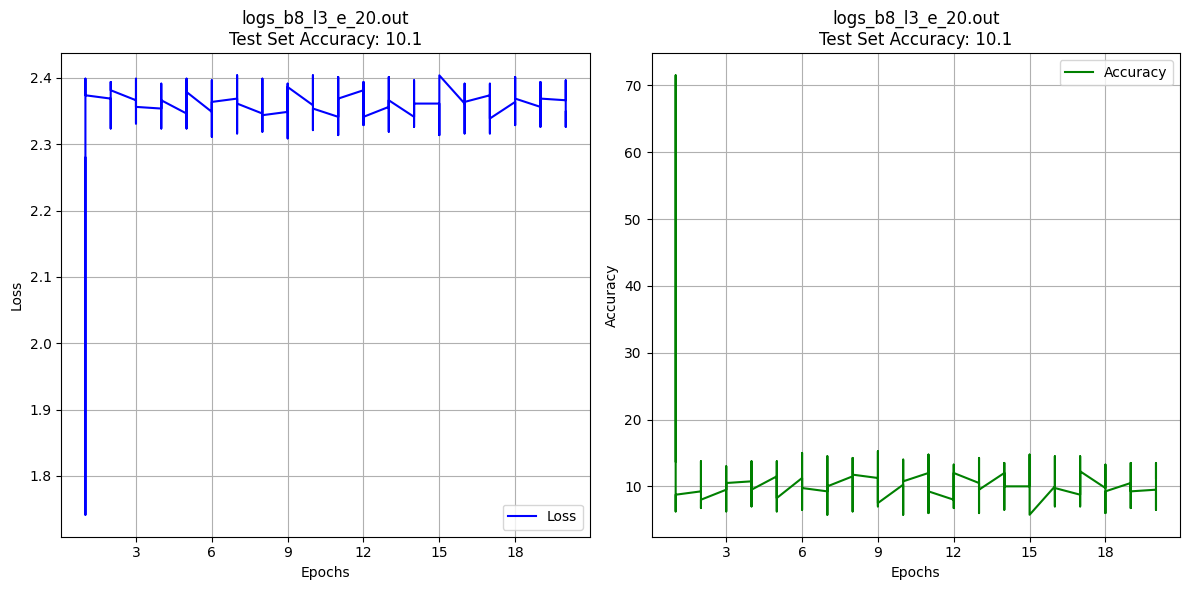

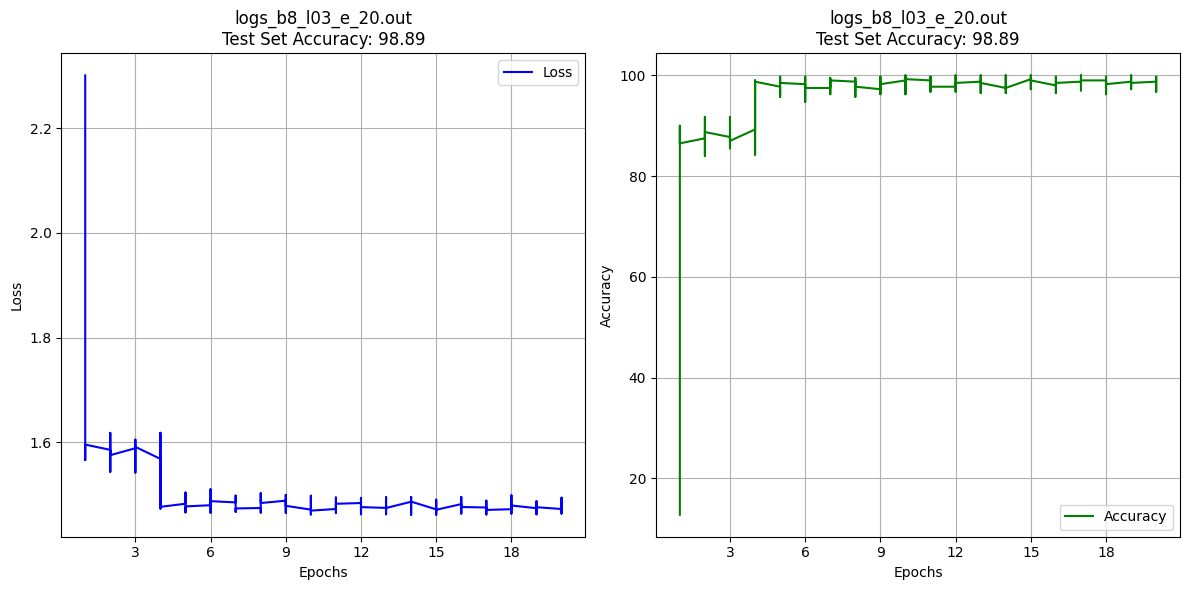

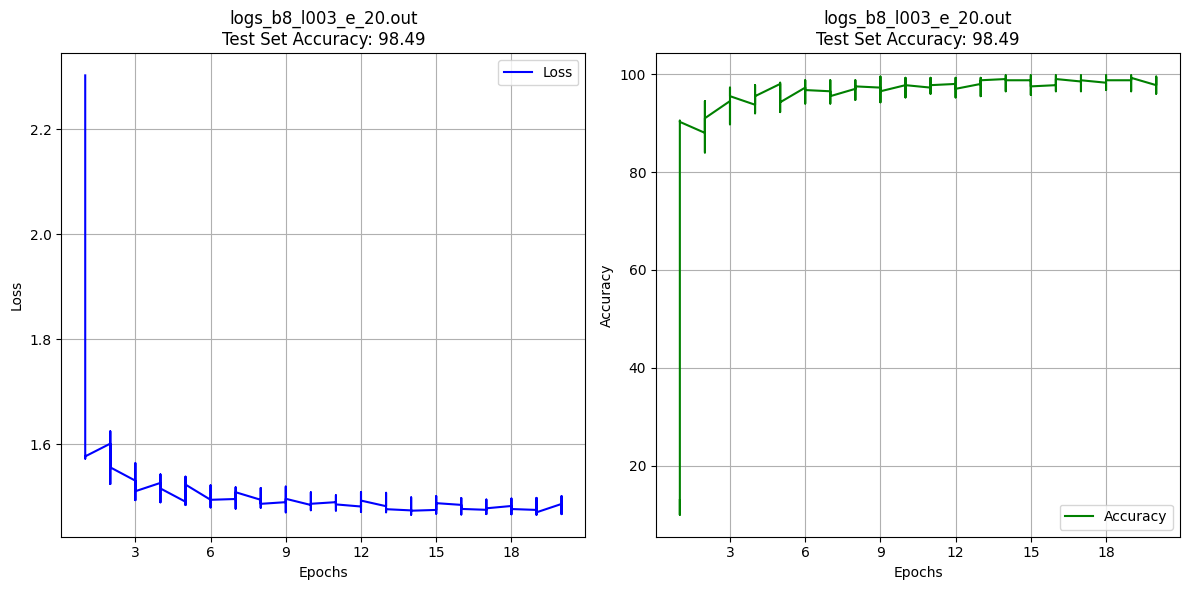

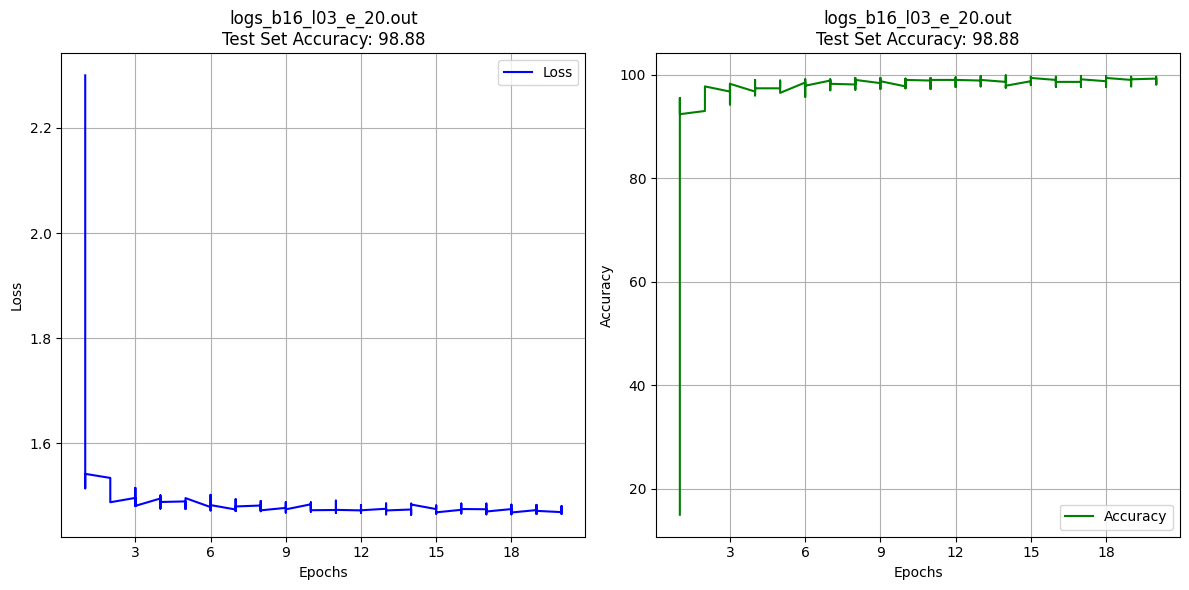

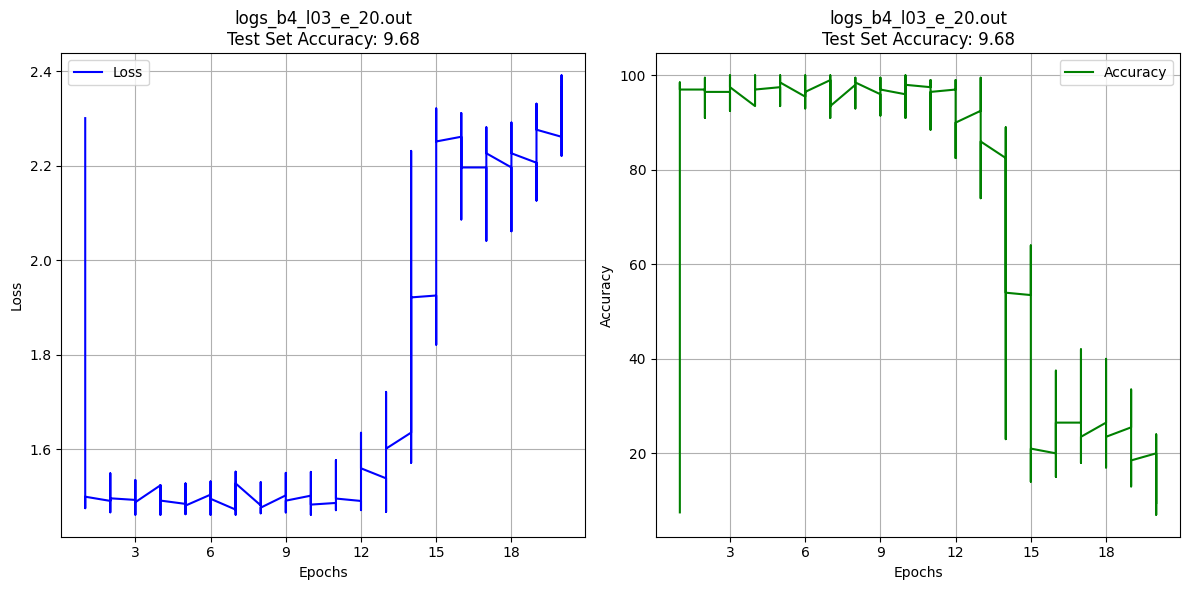

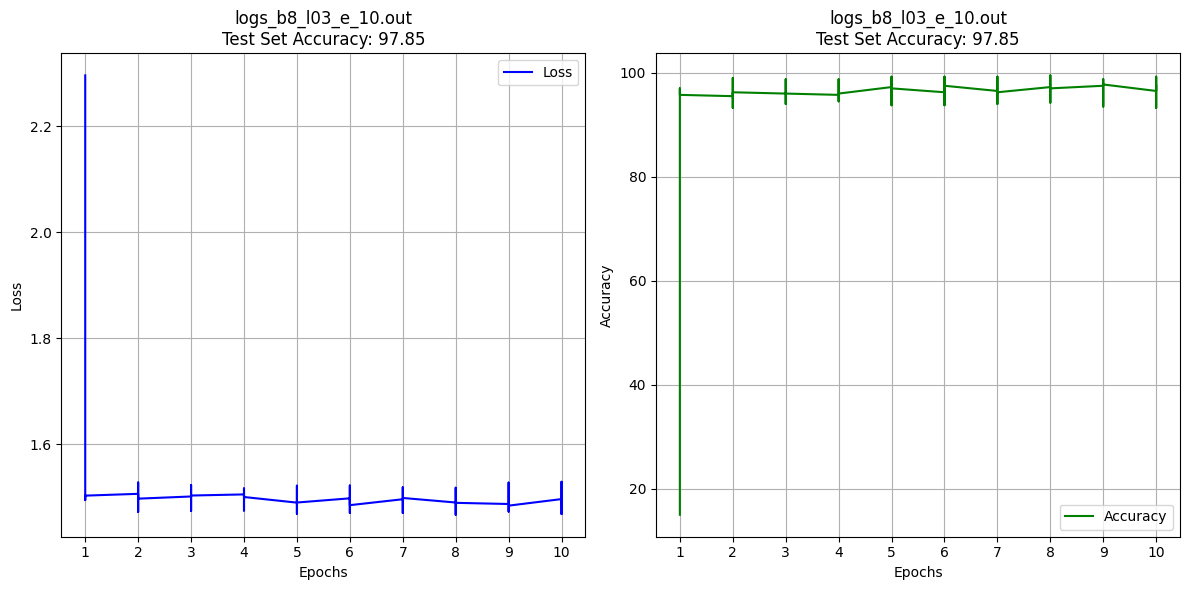

In [28]:
folder_path = './graphcore/logs_gc/'
data, test_accuracy = process_log_file2(folder_path)
plot_data(data, test_accuracy)

## Cerebras

### batch size = 1024 gives the minimum loss at the end of the training. all batch sizes renders comparable results. global rate is more stable across the steps

In [29]:
def process_log_file3(folder_path):
    steps = []
    losses = []
    rates = []
    global_rates = []
    
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".log"):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    match = re.search(r"Step=(\d+), Loss=([\d.]+), Rate=([\d.]+) samples/sec, GlobalRate=([\d.]+) samples/sec", line)
                    if match:
                        step = int(match.group(1))
                        loss = float(match.group(2))
                        rate = float(match.group(3))
                        global_rate = float(match.group(4))
                        steps.append(step)
                        losses.append(loss)
                        rates.append(rate)
                        global_rates.append(global_rate)

    df = pd.DataFrame({
        'Step': steps,
        'Loss': losses,
        'Rate': rates,
        'Global Rate': global_rates,
    })
    print(df)
    return df

   Step     Loss     Rate  Global Rate
0   100  9.39062   535.43       535.43
1   200  8.70312   932.07       739.80
2   300  7.79688  1503.74       927.65
3   400  7.39062  1316.66       982.09
4   500  7.80469  1163.62       997.02
5   600  7.53125  1514.55      1073.95
6   700  7.35156  1673.98      1138.48
7   800  7.27344  1730.11      1191.48
8   900  7.35938  1580.88      1217.97
9  1000  7.12500  1265.96      1199.57


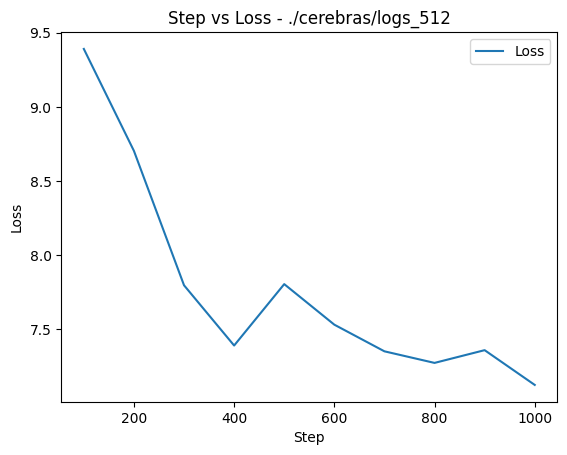

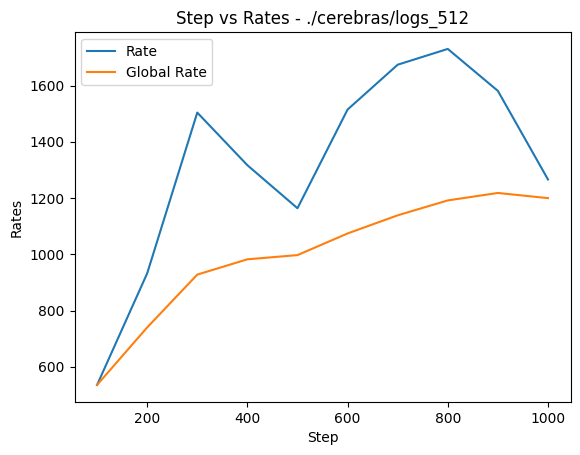

   Step     Loss     Rate  Global Rate
0   100  9.48438  4897.97      4897.98
1   200  8.35938  4864.09      4869.57
2   300  7.91406  4854.72      4862.52
3   400  7.54688  4801.43      4838.00
4   500  7.46875  4827.34      4839.32
5   600  7.39844  4819.01      4834.99
6   700  7.35156  4837.44      4837.09
7   800  7.25000  3107.95      4084.40
8   900  7.21094  4165.94      4159.04
9  1000  7.07812  4562.25      4217.36


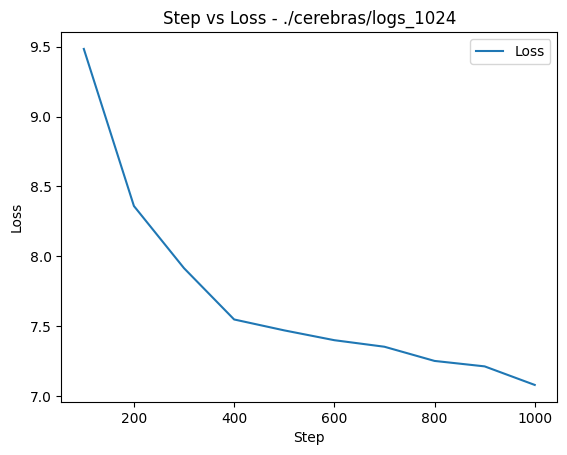

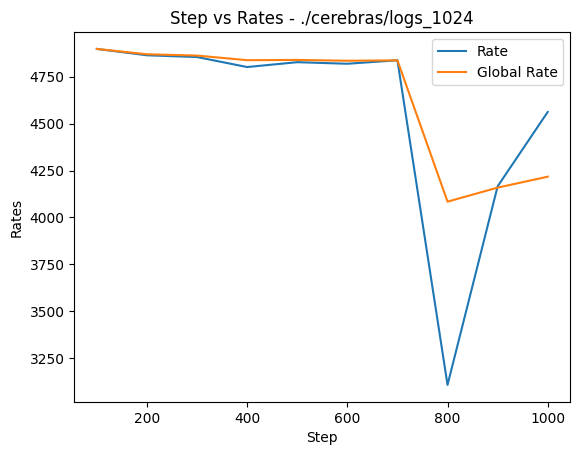

   Step     Loss     Rate  Global Rate
0   100  9.48438  4808.90      4808.92
1   200  8.48438  4485.30      4523.22
2   300  7.77344  4747.40      4648.81
3   400  7.64062  6757.80      5202.82
4   500  7.37500  9958.29      5871.90
5   600  7.42188  7058.50      5732.73
6   700  7.25000  7717.24      5986.87
7   800  7.12500  6830.47      6017.30
8   900  7.25000  5326.46      5766.35
9  1000  7.14844  5178.19      5689.40


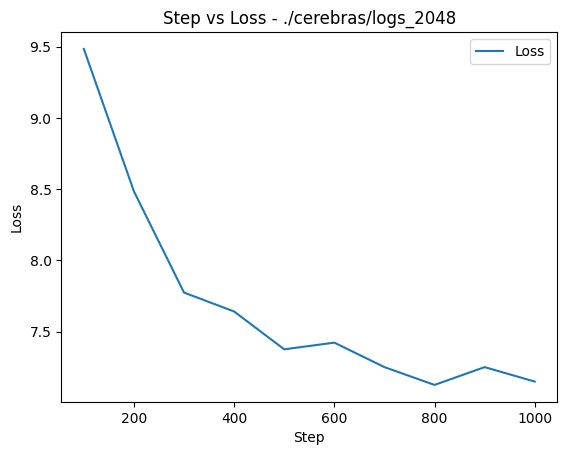

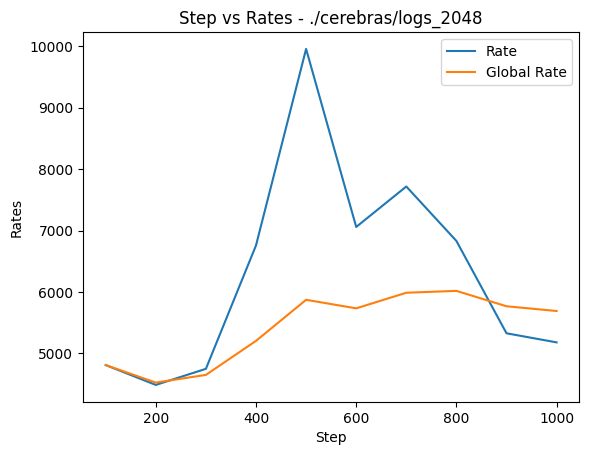

In [30]:
folder_paths = ['./cerebras/logs_512', './cerebras/logs_1024', './cerebras/logs_2048']
for folder_path in folder_paths:
    df = process_log_file3(folder_path)
    plt.plot(df['Step'], df['Loss'], label='Loss')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Step vs Loss - ' + folder_path)
    plt.legend()
    plt.show()

    plt.plot(df['Step'], df['Rate'], label='Rate')
    plt.plot(df['Step'], df['Global Rate'], label='Global Rate')
    plt.xlabel('Step')
    plt.ylabel('Rates')
    plt.title('Step vs Rates - ' + folder_path)
    plt.legend()
    plt.show()

## Groq

### no difference in accuracy. some differences in end-to-end and on-chip latency.

In [33]:
def process_log_file4(directory):
    files = os.listdir(directory)
    out_files = [file for file in files if file.endswith(".out")]
    if out_files:
        print("Found .out files in directory:", directory)
        for out_file in out_files:
            file_path = os.path.join(directory, out_file)
            with open(file_path, "r") as file:
                print(f"\033[1m CONTENTS OF {out_file}:\033[0m")
                print(file.read())
                print()
    else:
        print("No .out files found in directory:", directory)


In [34]:
folder_path = "./groq/logs_groq/"
process_log_file4(folder_path)

Found .out files in directory: ./groq/logs_groq/
 CONTENTS OF custom.out:
/home/shikhararora/miniconda3/envs/groqflow/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()

         
         - Input shape of model "bert_tiny_custom" changed from {'attention_mask': (10, 256), 'input_ids': (10, 256)} to {'attention_mask': (1, 256), 'input_ids': (1, 256)} since the last time it was built. 
         
         build_model() will now rebuild your model to ensure correctness. You can change this policy by setting the build_model(rebuild=...) argument.



Building "bert_tiny_custom"
      Exporting PyTorch to ONNX   
      Optimizing ONNX file   
      Checking for Op sup